In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

df = pd.read_csv('Group_20_data_cleaned.csv')
df.drop('Unnamed: 0', axis = 1 , inplace = True)
df["Letter"] = pd.factorize(df['Letter'])[0]

In [2]:
X, y = df.iloc[:,1:].to_numpy(), df.Letter.to_numpy()

## Clustering

In [3]:
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
import numpy as np

silhouette, davis_bouildin, calinski = [], [], []
error_rate = []

ks = list(range(150, 2, -10))

for k in tqdm(ks):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
  error_rate.append(kmeans.inertia_)
  silhouette.append(silhouette_score(X, kmeans.labels_))
  calinski.append(calinski_harabasz_score(X, kmeans.labels_))
  davis_bouildin.append(davies_bouldin_score(X, kmeans.labels_))
  

100%|███████████████████████████████████████████| 15/15 [01:05<00:00,  4.39s/it]


In [4]:
# from tqdm import tqdm
# from sklearn.cluster import FeatureAgglomeration
# from sklearn.metrics import davies_bouldin_score
# from sklearn.metrics import calinski_harabasz_score
# from sklearn.metrics import silhouette_score
# import numpy as np

# silhouette, davis_bouildin, calinski = [], [], []

# ks = list(range(150, 2, -10))

# for k in tqdm(ks):
#   feature_agglomeration = FeatureAgglomeration(n_clusters=k).fit(X)
#   silhouette.append(silhouette_score(X, feature_agglomeration.labels_))
#   calinski.append(calinski_harabasz_score(X, feature_agglomeration.labels_))
#   davis_bouildin.append(davies_bouldin_score(X, feature_agglomeration.labels_))
  

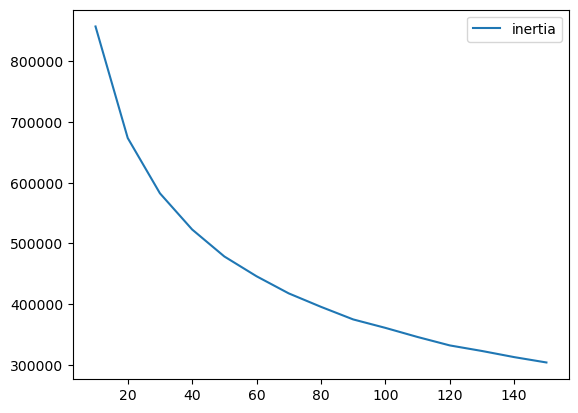

In [5]:
# importing package
import matplotlib.pyplot as plt
import numpy as np


# lower the better
plt.plot(ks, error_rate, label = "inertia")
# plt.plot(ks, calinski, label = "calinski_harabasz_score")
# plt.plot(ks, davis_bouildin, label = "davies_bouldin_score")

plt.legend()
plt.show()

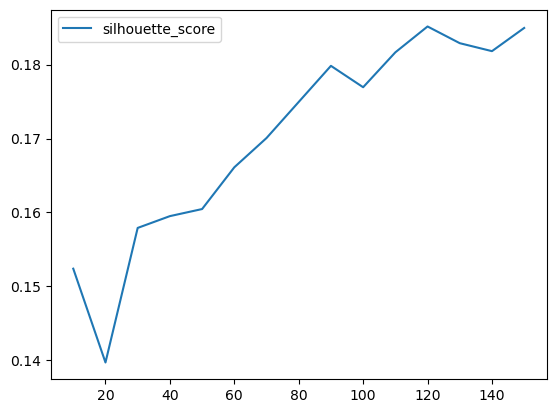

In [6]:
# score lies between -1 and 1. higher the better
plt.plot(ks, silhouette, label = "silhouette_score")

plt.legend()
plt.show()

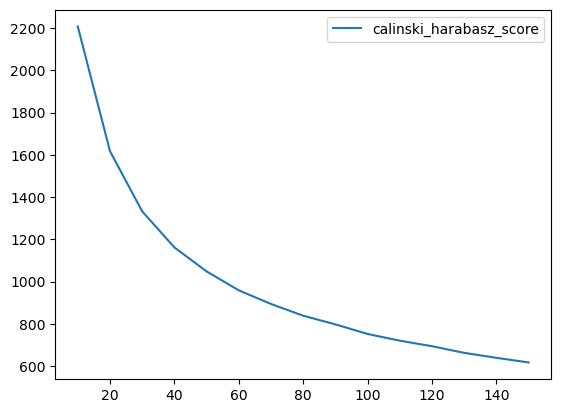

In [7]:
# higher the better
plt.plot(ks, calinski, label = "calinski_harabasz_score")
plt.legend()
plt.show()

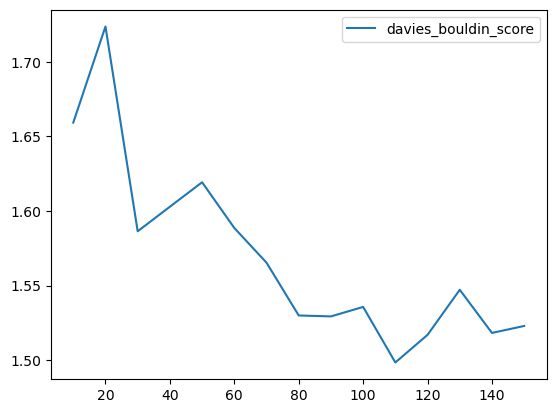

In [8]:
# The minimum score is zero, with lower values indicating better clustering.

plt.plot(ks, davis_bouildin, label = "davies_bouldin_score")
plt.legend()
plt.show()